# GANs Image Generation

In this notebook, we will explore how Generative Adversarial Networks (GANs) generate images. We will use a pretrained GAN model (BigGAN) to generate images from random noise.

## Instructions
1. Run the code below to generate an image from random noise.
2. Modify the latent vector to generate different images.
3. Experiment with generating different images by altering the latent vector and visualizing the results.


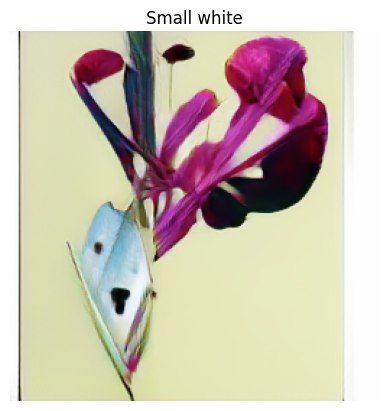

In [4]:
import torch
from pytorch_pretrained_biggan import BigGAN, one_hot_from_int, truncated_noise_sample
from torchvision import transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load pretrained BigGAN model
model = BigGAN.from_pretrained('biggan-deep-256')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Label enabling
import json
import urllib.request

with urllib.request.urlopen('https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json') as url:
    labels = json.loads(url.read().decode())

class_index = np.random.randint(0, 1000)
class_name = labels[class_index].capitalize()

# Generate latent vector and class
truncation = 0.4
latent_vector = torch.randn(1,128).to(device)
class_vector = one_hot_from_int([class_index], batch_size=1)

# Convert to torch tensors
class_vector = torch.from_numpy(class_vector).to(device)

# Generate image
with torch.no_grad():
    output = model(latent_vector, class_vector, truncation)

output = (output + 1) / 2

# Convert the tensor to a displayable image
plt.imshow(np.transpose(output[0].cpu().numpy(), (1, 2, 0)))
plt.title(class_name)
plt.axis('off')
plt.show()

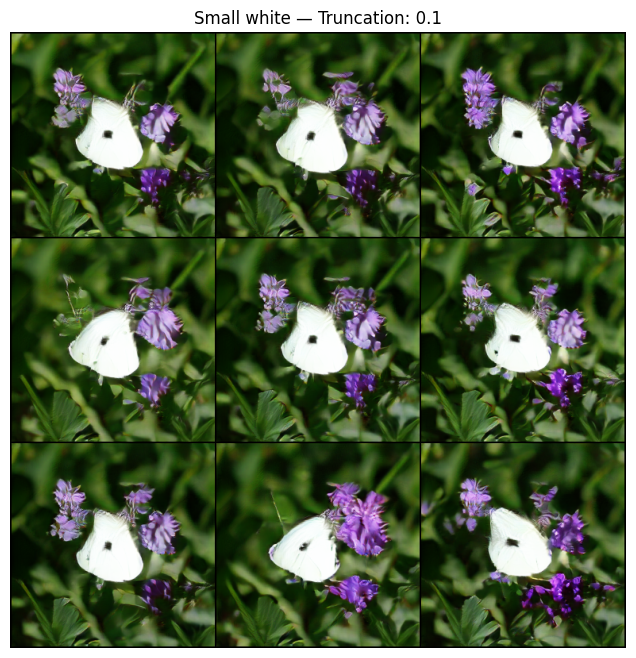

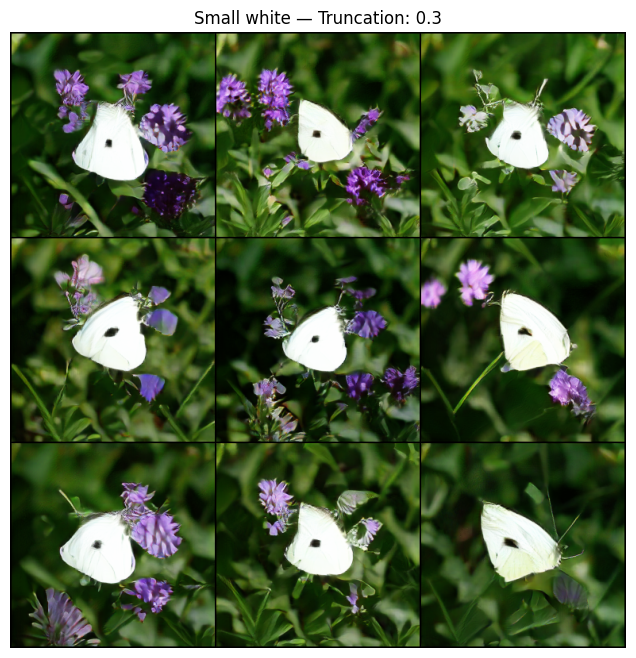

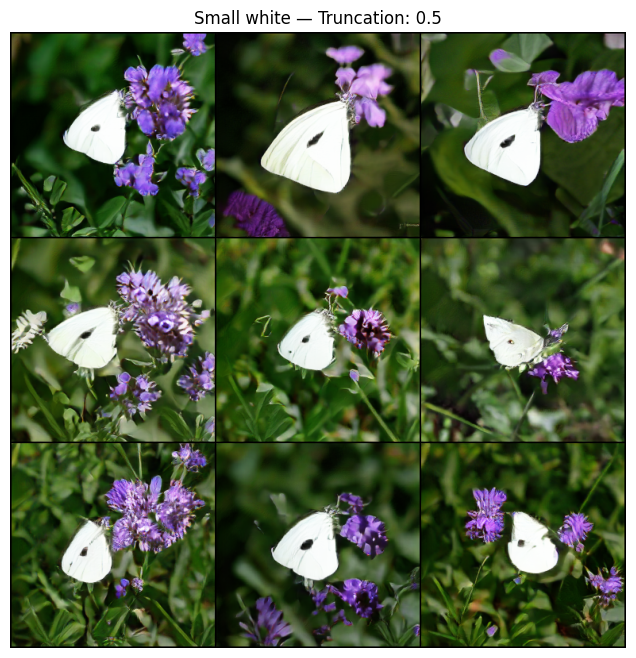

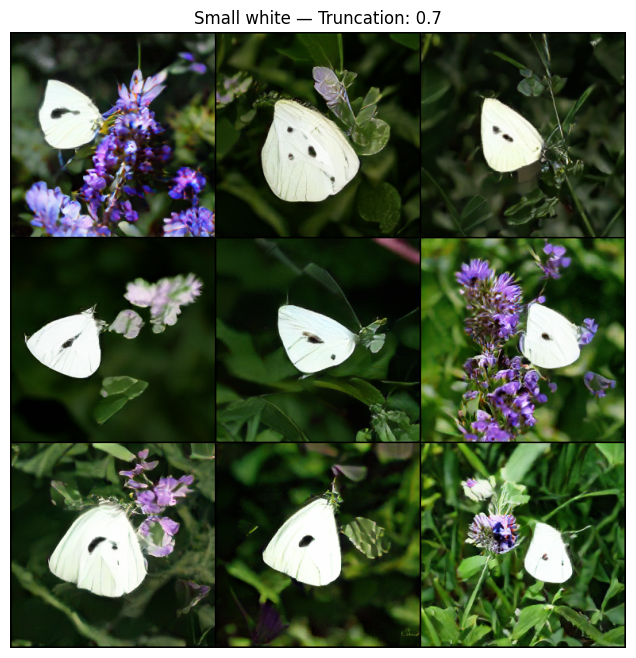

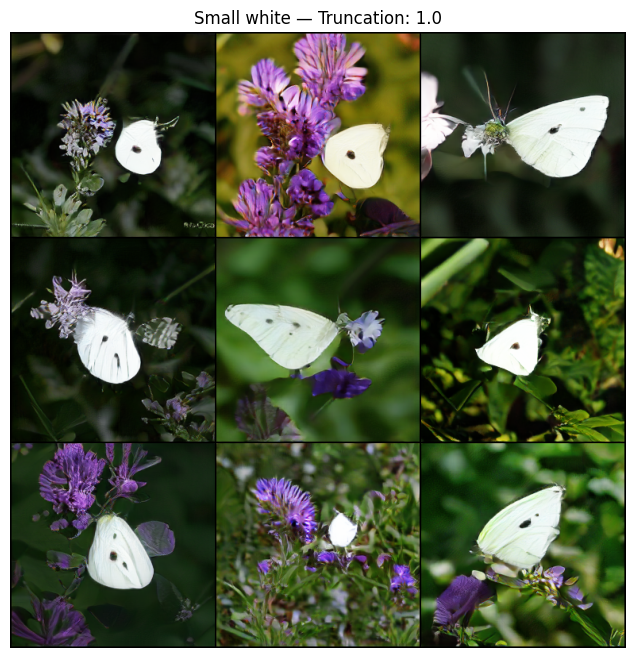

In [5]:
# Experiment with different latent vectors
class_vector = one_hot_from_int([class_index]*9, batch_size=9)
class_vector = torch.from_numpy(class_vector).to(device)

truncation_values = [0.1, 0.3, 0.5, 0.7, 1.0]
for trunc in truncation_values:
    # Generate 9 samples per truncation level
    latent_vector = truncated_noise_sample(truncation=trunc, batch_size=9)
    latent_vector = torch.from_numpy(latent_vector).to(device)

    with torch.no_grad():
        output = model(latent_vector, class_vector, trunc)
    output = (output + 1) / 2

    grid = make_grid(output.cpu(), nrow=3, padding=2)
    plt.figure(figsize=(8, 8))
    plt.imshow(np.transpose(grid.numpy(), (1, 2, 0)))
    plt.title(f'{class_name} — Truncation: {trunc}')
    plt.axis('off')
    plt.show()

## Reflection

Now that you have generated images, write a brief report reflecting on your observations:

1. How did the generated images change when you modified the latent vector?
2. What patterns did you notice in the generated images? Were they realistic?
3. How does the process of generating images from noise differ from traditional image generation methods?
4. What challenges or limitations did you observe with the GAN model?

1. The generated images distort based on the latent vector. It acts kind of like a seed for the model to generate an image by, changing the latent vector will deterministically generate new images. Using a truncated noise sampler, we can consistly generate more cohesive images using a truncation value.
2. The generated images were pretty realistic depending on the noise vector the model was given. The variety we see in the later images, the batches of nine, depend on their truncation value and we can observe that within the same batch, images generated with higher truncation show more variety amongst its peers.
3. In a GAN model, there are two components that work against each other to try and generate realistic images while also classifying whether it is real or not. This style of machine learning allows an extra validation step that traditional image generation methods lack.
4. There is a noticible lack of diversity in the generated imagery. Even with a high truncation value, we still observe the same scenary with each image class. I have the script set to randomize the class in the first cell and to generate batches in the second so feel free to use these to see what I mean in that image variety is scarse.